In [1]:
import GAN.models as models
import GAN.cms_datasets as cms
import GAN.plotting as plotting
import GAN.preprocessing as preprocessing
import GAN.base as base

Using TensorFlow backend.


In [2]:
import GAN.utils as utils

reload(utils)

class Parameters(utils.Parameters):
    
    # load_datasets=utils.param(["moriond_v9","abs(ScEta) < 1.5"])

    # c_names = utils.param(['Pt','ScEta','Phi','rho'])
    # x_names = utils.param(['R9','SigmaIeIe','S4','EtaWidth','PhiWidth','CovarianceIetaIphi',
    #           'CovarianceIphiIphi', ])
    
    # feat_transform = utils.param('minmax')
    
    g_opts=utils.param(dict(name="G_64x5",kernel_sizes=[64]*5))
    d_opts=utils.param(dict(name="D_256x5",kernel_sizes=[256]*5,
                        clip_weights=2.e-2,activation=None)) # weight clipping and no actication
    dm_opts=utils.param(dict(optimizer="RMSprop",opt_kwargs=dict(lr=0.00001)))#, decay=6e-6)))
    am_opts=utils.param(dict(optimizer="RMSprop",opt_kwargs=dict(lr=0.00001)))#, decay=6e-6)))
    
    epochs=utils.param(100)
    batch_size=utils.param(4096)
    plot_every=utils.param(5)
    
    # frac_data=utils.param(10)
    
    loss = "wgan_loss" # use WGAN loss 
    gan_targets = 'gan_targets_hinge' # hinge targets are 1, -1 instead of 0, 1
    schedule = [0]*5+[1] # number of critic iterations per generators iteration
    
class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

notebook_parameters = Parameters(MyApp()).get_params()

globals().update(notebook_parameters)
DM_OPTS.update( {"loss":LOSS} )
AM_OPTS.update( {"loss":LOSS} )
notebook_parameters


{'AM_OPTS': {'loss': 'wgan_loss',
  'opt_kwargs': {'lr': 1e-05},
  'optimizer': 'RMSprop'},
 'BATCH_SIZE': 4096,
 'DM_OPTS': {'loss': 'wgan_loss',
  'opt_kwargs': {'lr': 1e-05},
  'optimizer': 'RMSprop'},
 'D_OPTS': {'activation': None,
  'clip_weights': 0.02,
  'kernel_sizes': [256, 256, 256, 256, 256],
  'name': 'D_256x5'},
 'EPOCHS': 100,
 'GAN_TARGETS': 'gan_targets_hinge',
 'G_OPTS': {'kernel_sizes': [64, 64, 64, 64, 64], 'name': 'G_64x5'},
 'LOSS': 'wgan_loss',
 'PLOT_EVERY': 5,
 'SCHEDULE': [0, 0, 0, 0, 0, 1]}

In [3]:
import GAN.toy_datasets as toys

In [4]:
reload(toys)
c_train,c_test,x_train,x_test,z_train,z_test =  toys.two_peaks_conditional_cube(500000)

(500000, 1, 1) (500000, 1, 1) (500000, 1, 1)
(500000, 1, 1) (500000, 1, 1) (500000, 1, 1)


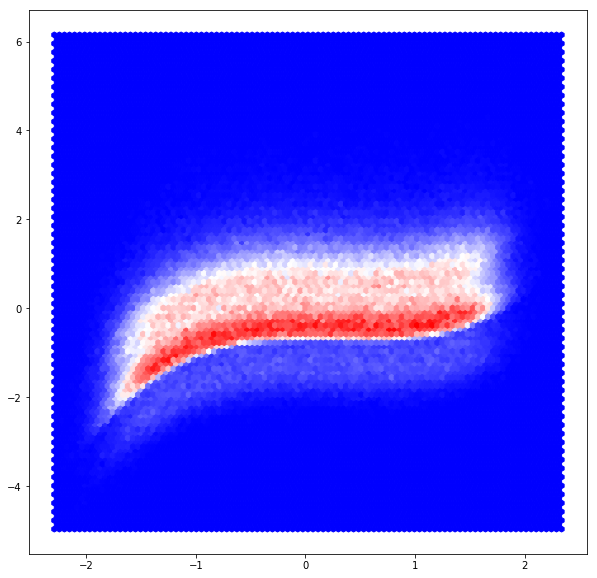

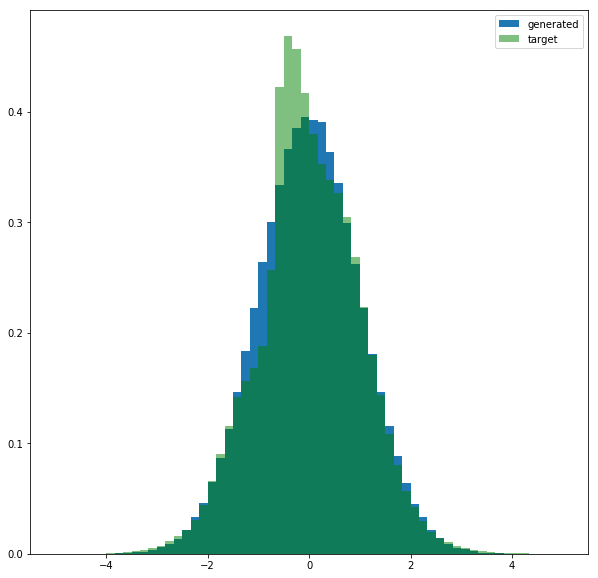

In [5]:
plt.hexbin( c_train.ravel(), x_train.ravel() )
plt.show()
plotting.plot_hists(x_train.ravel(),z_train.ravel())#,range=[-4,10])

In [6]:
xz_shape = x_train.shape[1:]
c_shape = c_train.shape[1:]

In [7]:
xz_shape

(1, 1)

In [8]:
reload(models)

gan = models.MyFFGAN( xz_shape, xz_shape, c_shape=c_shape,
                     g_opts=G_OPTS,
                     d_opts=D_OPTS,
                     dm_opts=DM_OPTS,
                     am_opts=AM_OPTS,
                     gan_targets=GAN_TARGETS
                    )

In [9]:
gan.get_generator()

(1, 1)


In [10]:
gan.get_discriminator()

In [11]:
gan.adversarial_compile(loss=LOSS,schedule=SCHEDULE)

In [12]:
gan.get_generator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 2)          0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         192         G_64x5_all_inputs[0][0] 

In [13]:
gan.get_discriminator().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 2)          0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        768         D_256x5_all_inputs[0][0]

In [14]:
gan.am.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 2)          0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
G_64x5_up1_dense (Dense)         (None, 1, 64)         192         G_64x5_all_inputs[0][0] 

In [15]:
gan.dm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
D_256x5_c_input (InputLayer)     (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_256x5_input (InputLayer)       (None, 1, 1)          0                                            
____________________________________________________________________________________________________
D_256x5_all_inputs (Concatenate) (None, 1, 2)          0           D_256x5_c_input[0][0]            
                                                                   D_256x5_input[0][0]              
____________________________________________________________________________________________________
D_256x5_down1_dense (Dense)      (None, 1, 256)        768         D_256x5_all_inputs[0][0]

In [16]:
gan.gan.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
G_64x5_c_input (InputLayer)      (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_input (InputLayer)        (None, 1, 1)          0                                            
____________________________________________________________________________________________________
G_64x5_all_inputs (Concatenate)  (None, 1, 2)          0           G_64x5_c_input[0][0]             
                                                                   G_64x5_input[0][0]               
____________________________________________________________________________________________________
D_256x5_c_input (InputLayer)     (None, 1, 1)          0                                   

In [17]:
gan.gan.outputs, gan.gan.inputs

([<tf.Tensor 'model_2/D_256x5_output/BiasAdd:0' shape=(?, 1) dtype=float32>,
  <tf.Tensor 'D_256x5_output/BiasAdd:0' shape=(?, 1) dtype=float32>],
 [<tf.Tensor 'G_64x5_c_input:0' shape=(?, 1, 1) dtype=float32>,
  <tf.Tensor 'G_64x5_input:0' shape=(?, 1, 1) dtype=float32>,
  <tf.Tensor 'D_256x5_c_input:0' shape=(?, 1, 1) dtype=float32>,
  <tf.Tensor 'D_256x5_input:0' shape=(?, 1, 1) dtype=float32>])

Epoch 199/298
 12288/375000 [..............................] - ETA: 5s - loss: 0.0000e+00 - generator_loss: 3.3244e-04 - generator_model_2_loss: 0.0078 - generator_D_256x5_output_loss: -0.0074 - discriminator_loss: -3.3244e-04 - discriminator_model_2_loss: -0.0078 - discriminator_D_256x5_output_loss: 0.0074

/users/musella/jupyter/GAN/GAN/base.py:132: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  callbacks = [plotter], **kwargs


375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.8868e-04 - generator_model_2_loss: 0.0074 - generator_D_256x5_output_loss: -0.0071 - discriminator_loss: -2.8868e-04 - discriminator_model_2_loss: -0.0074 - discriminator_D_256x5_output_loss: 0.0071     
Epoch 200/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.9319e-04 - generator_model_2_loss: 0.0088 - generator_D_256x5_output_loss: -0.0086 - discriminator_loss: -2.9319e-04 - discriminator_model_2_loss: -0.0088 - discriminator_D_256x5_output_loss: 0.0086     
Epoch 201/298
372736/375000 [============================>.] - ETA: 0s - loss: 0.0000e+00 - generator_loss: 2.8366e-04 - generator_model_2_loss: 0.0071 - generator_D_256x5_output_loss: -0.0068 - discriminator_loss: -2.8366e-04 - discriminator_model_2_loss: -0.0071 - discriminator_D_256x5_output_loss: 0.0068

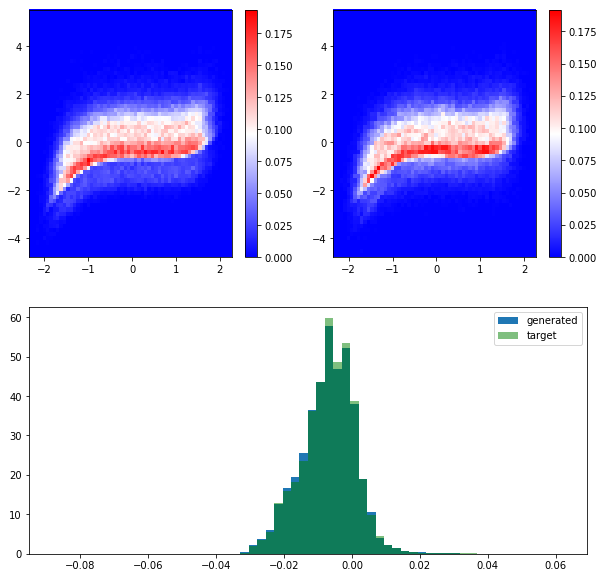

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 2.8439e-04 - generator_model_2_loss: 0.0071 - generator_D_256x5_output_loss: -0.0068 - discriminator_loss: -2.8439e-04 - discriminator_model_2_loss: -0.0071 - discriminator_D_256x5_output_loss: 0.0068    
Epoch 202/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.7551e-04 - generator_model_2_loss: 0.0079 - generator_D_256x5_output_loss: -0.0076 - discriminator_loss: -2.7551e-04 - discriminator_model_2_loss: -0.0079 - discriminator_D_256x5_output_loss: 0.0076     
Epoch 203/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.7655e-04 - generator_model_2_loss: 0.0053 - generator_D_256x5_output_loss: -0.0051 - discriminator_loss: -2.7655e-04 - discriminator_model_2_loss: -0.0053 - discriminator_D_256x5_output_loss: 0.0051     
Epoch 204/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

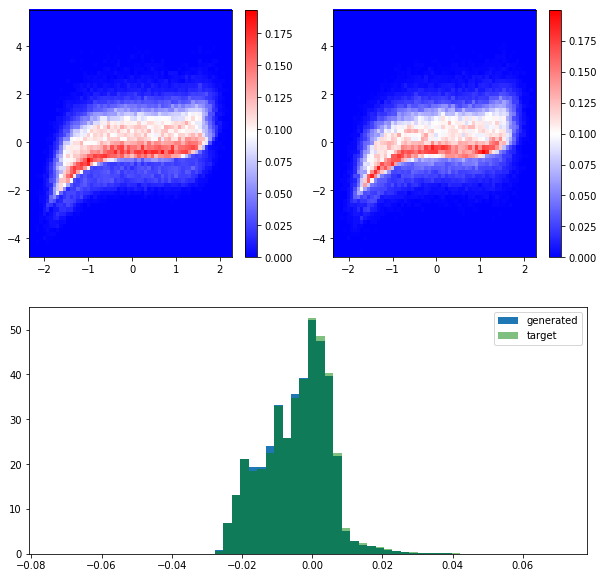

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 2.6460e-04 - generator_model_2_loss: 0.0052 - generator_D_256x5_output_loss: -0.0049 - discriminator_loss: -2.6460e-04 - discriminator_model_2_loss: -0.0052 - discriminator_D_256x5_output_loss: 0.0049    
Epoch 207/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.8851e-04 - generator_model_2_loss: 0.0049 - generator_D_256x5_output_loss: -0.0046 - discriminator_loss: -2.8851e-04 - discriminator_model_2_loss: -0.0049 - discriminator_D_256x5_output_loss: 0.0046     
Epoch 208/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.6403e-04 - generator_model_2_loss: 0.0064 - generator_D_256x5_output_loss: -0.0062 - discriminator_loss: -2.6403e-04 - discriminator_model_2_loss: -0.0064 - discriminator_D_256x5_output_loss: 0.0062     
Epoch 209/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

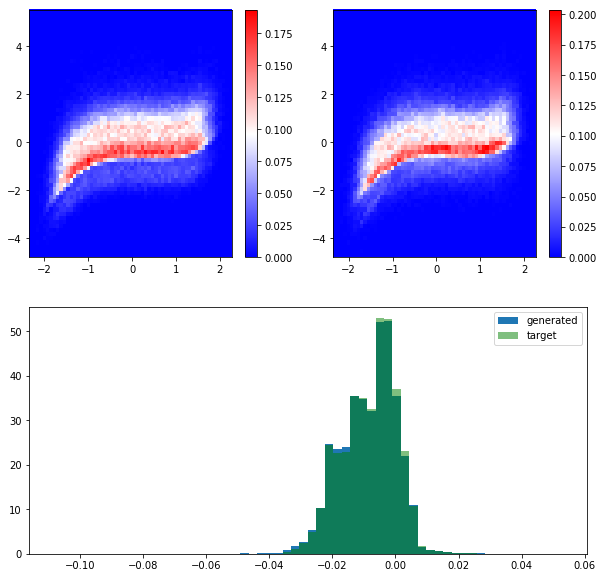

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: 2.5038e-04 - generator_model_2_loss: 0.0085 - generator_D_256x5_output_loss: -0.0082 - discriminator_loss: -2.5038e-04 - discriminator_model_2_loss: -0.0085 - discriminator_D_256x5_output_loss: 0.0082    
Epoch 212/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.6415e-04 - generator_model_2_loss: 0.0103 - generator_D_256x5_output_loss: -0.0101 - discriminator_loss: -2.6415e-04 - discriminator_model_2_loss: -0.0103 - discriminator_D_256x5_output_loss: 0.0101     
Epoch 213/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.6628e-04 - generator_model_2_loss: 0.0084 - generator_D_256x5_output_loss: -0.0081 - discriminator_loss: -2.6628e-04 - discriminator_model_2_loss: -0.0084 - discriminator_D_256x5_output_loss: 0.0081     
Epoch 214/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

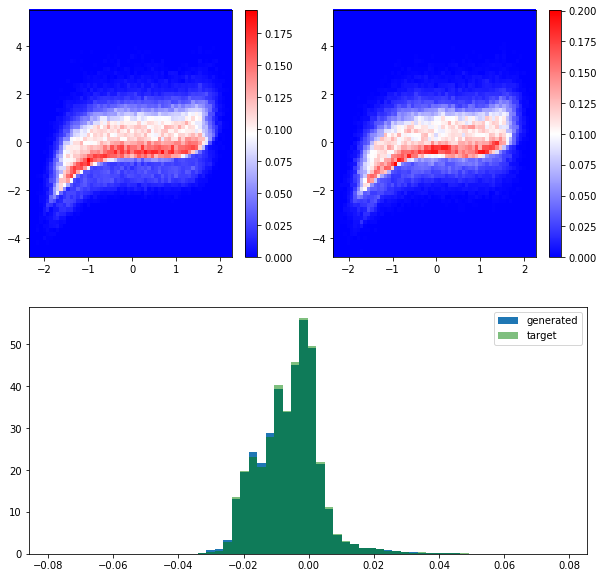

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 2.6341e-04 - generator_model_2_loss: 0.0094 - generator_D_256x5_output_loss: -0.0092 - discriminator_loss: -2.6341e-04 - discriminator_model_2_loss: -0.0094 - discriminator_D_256x5_output_loss: 0.0092    
Epoch 217/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.5110e-04 - generator_model_2_loss: 0.0084 - generator_D_256x5_output_loss: -0.0082 - discriminator_loss: -2.5110e-04 - discriminator_model_2_loss: -0.0084 - discriminator_D_256x5_output_loss: 0.0082     
Epoch 218/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.4688e-04 - generator_model_2_loss: 0.0088 - generator_D_256x5_output_loss: -0.0085 - discriminator_loss: -2.4688e-04 - discriminator_model_2_loss: -0.0088 - discriminator_D_256x5_output_loss: 0.0085     
Epoch 219/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

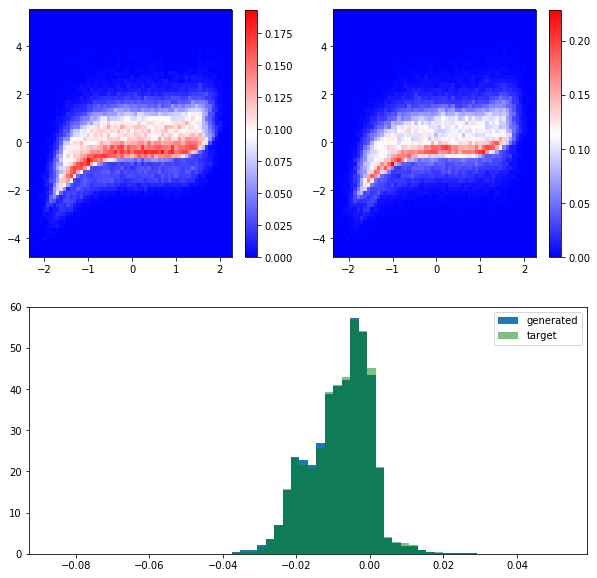

375000/375000 [==============================] - 21s - loss: 0.0000e+00 - generator_loss: 2.4304e-04 - generator_model_2_loss: 0.0091 - generator_D_256x5_output_loss: -0.0089 - discriminator_loss: -2.4304e-04 - discriminator_model_2_loss: -0.0091 - discriminator_D_256x5_output_loss: 0.0089    
Epoch 222/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.5127e-04 - generator_model_2_loss: 0.0090 - generator_D_256x5_output_loss: -0.0087 - discriminator_loss: -2.5127e-04 - discriminator_model_2_loss: -0.0090 - discriminator_D_256x5_output_loss: 0.0087     
Epoch 223/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.4277e-04 - generator_model_2_loss: 0.0101 - generator_D_256x5_output_loss: -0.0099 - discriminator_loss: -2.4277e-04 - discriminator_model_2_loss: -0.0101 - discriminator_D_256x5_output_loss: 0.0099     
Epoch 224/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

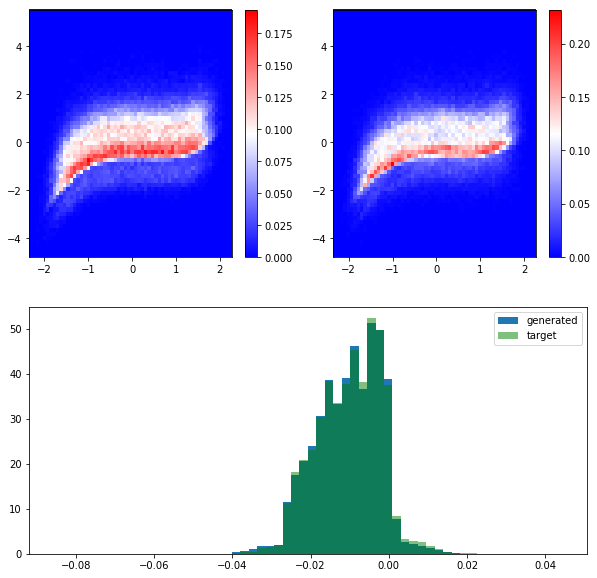

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 1.9963e-04 - generator_model_2_loss: 0.0104 - generator_D_256x5_output_loss: -0.0102 - discriminator_loss: -1.9963e-04 - discriminator_model_2_loss: -0.0104 - discriminator_D_256x5_output_loss: 0.0102    
Epoch 227/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.4567e-04 - generator_model_2_loss: 0.0103 - generator_D_256x5_output_loss: -0.0100 - discriminator_loss: -2.4567e-04 - discriminator_model_2_loss: -0.0103 - discriminator_D_256x5_output_loss: 0.0100     
Epoch 228/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.0544e-04 - generator_model_2_loss: 0.0121 - generator_D_256x5_output_loss: -0.0119 - discriminator_loss: -2.0544e-04 - discriminator_model_2_loss: -0.0121 - discriminator_D_256x5_output_loss: 0.0119     
Epoch 229/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

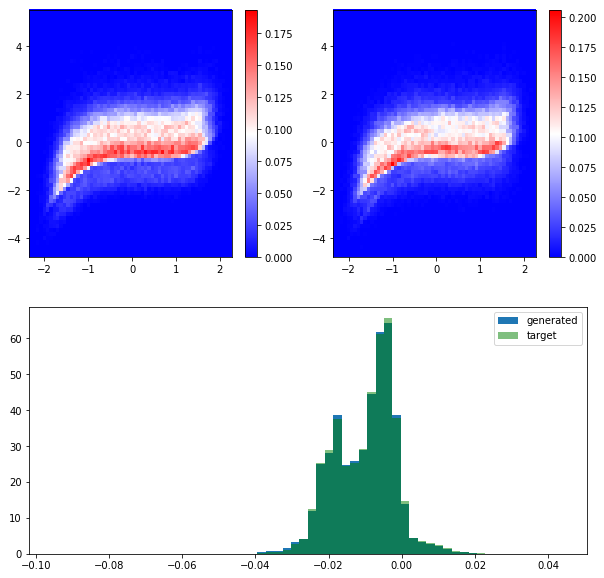

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: 2.1867e-04 - generator_model_2_loss: 0.0087 - generator_D_256x5_output_loss: -0.0085 - discriminator_loss: -2.1867e-04 - discriminator_model_2_loss: -0.0087 - discriminator_D_256x5_output_loss: 0.0085    
Epoch 232/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.9543e-04 - generator_model_2_loss: 0.0112 - generator_D_256x5_output_loss: -0.0110 - discriminator_loss: -1.9543e-04 - discriminator_model_2_loss: -0.0112 - discriminator_D_256x5_output_loss: 0.0110     
Epoch 233/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.8603e-04 - generator_model_2_loss: 0.0104 - generator_D_256x5_output_loss: -0.0102 - discriminator_loss: -1.8603e-04 - discriminator_model_2_loss: -0.0104 - discriminator_D_256x5_output_loss: 0.0102     
Epoch 234/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

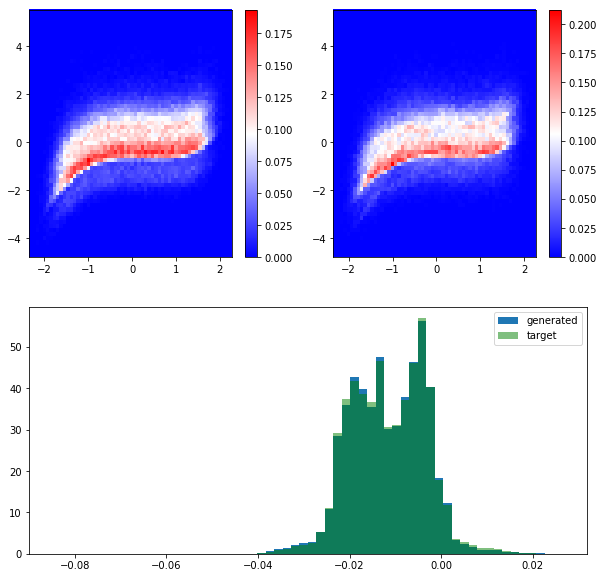

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 1.8738e-04 - generator_model_2_loss: 0.0105 - generator_D_256x5_output_loss: -0.0104 - discriminator_loss: -1.8738e-04 - discriminator_model_2_loss: -0.0105 - discriminator_D_256x5_output_loss: 0.0104    
Epoch 237/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.6249e-04 - generator_model_2_loss: 0.0116 - generator_D_256x5_output_loss: -0.0114 - discriminator_loss: -1.6249e-04 - discriminator_model_2_loss: -0.0116 - discriminator_D_256x5_output_loss: 0.0114     
Epoch 238/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.5987e-04 - generator_model_2_loss: 0.0104 - generator_D_256x5_output_loss: -0.0102 - discriminator_loss: -1.5987e-04 - discriminator_model_2_loss: -0.0104 - discriminator_D_256x5_output_loss: 0.0102     
Epoch 239/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

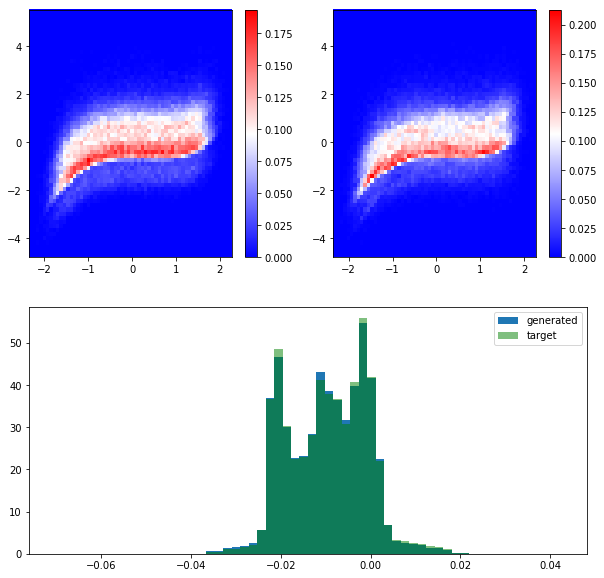

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: 1.5204e-04 - generator_model_2_loss: 0.0113 - generator_D_256x5_output_loss: -0.0111 - discriminator_loss: -1.5204e-04 - discriminator_model_2_loss: -0.0113 - discriminator_D_256x5_output_loss: 0.0111    
Epoch 242/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.5677e-04 - generator_model_2_loss: 0.0103 - generator_D_256x5_output_loss: -0.0101 - discriminator_loss: -1.5677e-04 - discriminator_model_2_loss: -0.0103 - discriminator_D_256x5_output_loss: 0.0101     
Epoch 243/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.5528e-04 - generator_model_2_loss: 0.0112 - generator_D_256x5_output_loss: -0.0110 - discriminator_loss: -1.5528e-04 - discriminator_model_2_loss: -0.0112 - discriminator_D_256x5_output_loss: 0.0110     
Epoch 244/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

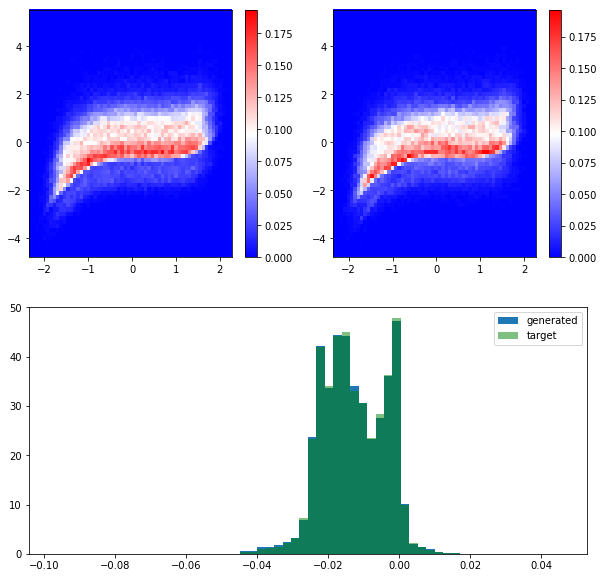

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 1.4591e-04 - generator_model_2_loss: 0.0123 - generator_D_256x5_output_loss: -0.0121 - discriminator_loss: -1.4591e-04 - discriminator_model_2_loss: -0.0123 - discriminator_D_256x5_output_loss: 0.0121    
Epoch 247/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.4229e-04 - generator_model_2_loss: 0.0116 - generator_D_256x5_output_loss: -0.0114 - discriminator_loss: -1.4229e-04 - discriminator_model_2_loss: -0.0116 - discriminator_D_256x5_output_loss: 0.0114     
Epoch 248/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.2730e-04 - generator_model_2_loss: 0.0088 - generator_D_256x5_output_loss: -0.0087 - discriminator_loss: -1.2730e-04 - discriminator_model_2_loss: -0.0088 - discriminator_D_256x5_output_loss: 0.0087     
Epoch 249/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

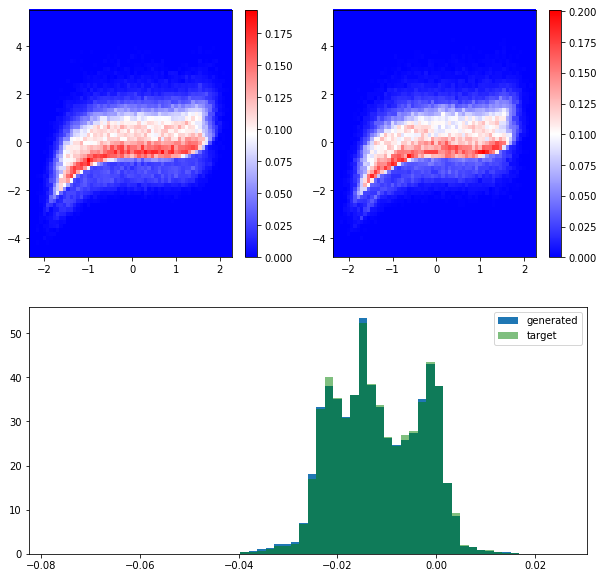

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 1.5360e-04 - generator_model_2_loss: 0.0103 - generator_D_256x5_output_loss: -0.0102 - discriminator_loss: -1.5360e-04 - discriminator_model_2_loss: -0.0103 - discriminator_D_256x5_output_loss: 0.0102    
Epoch 252/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.1206e-04 - generator_model_2_loss: 0.0124 - generator_D_256x5_output_loss: -0.0123 - discriminator_loss: -1.1206e-04 - discriminator_model_2_loss: -0.0124 - discriminator_D_256x5_output_loss: 0.0123     
Epoch 253/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 9.3559e-05 - generator_model_2_loss: 0.0120 - generator_D_256x5_output_loss: -0.0119 - discriminator_loss: -9.3559e-05 - discriminator_model_2_loss: -0.0120 - discriminator_D_256x5_output_loss: 0.0119     
Epoch 254/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

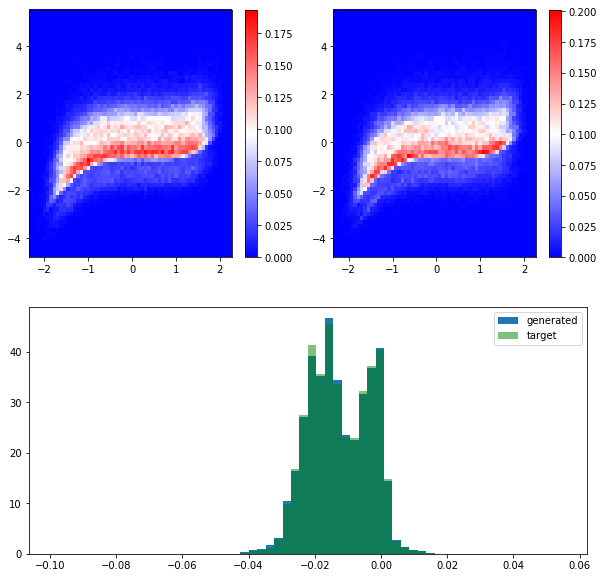

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 9.6131e-05 - generator_model_2_loss: 0.0120 - generator_D_256x5_output_loss: -0.0119 - discriminator_loss: -9.6131e-05 - discriminator_model_2_loss: -0.0120 - discriminator_D_256x5_output_loss: 0.0119    
Epoch 257/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.0273e-04 - generator_model_2_loss: 0.0140 - generator_D_256x5_output_loss: -0.0139 - discriminator_loss: -1.0273e-04 - discriminator_model_2_loss: -0.0140 - discriminator_D_256x5_output_loss: 0.0139     
Epoch 258/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 8.6997e-05 - generator_model_2_loss: 0.0136 - generator_D_256x5_output_loss: -0.0135 - discriminator_loss: -8.6997e-05 - discriminator_model_2_loss: -0.0136 - discriminator_D_256x5_output_loss: 0.0135     
Epoch 259/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

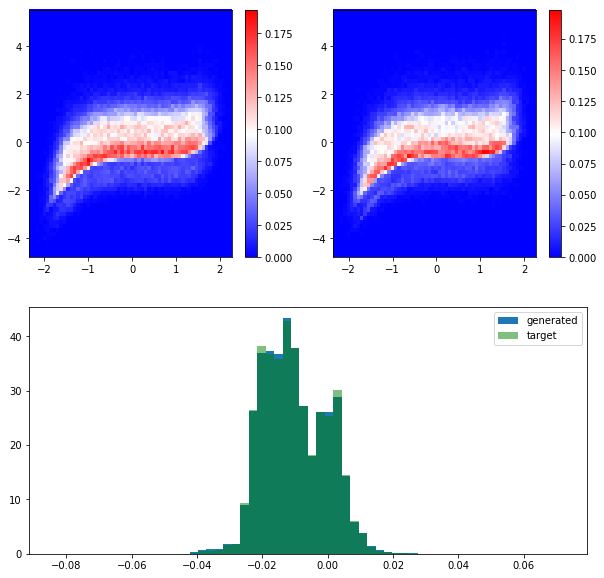

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 9.8472e-05 - generator_model_2_loss: 0.0127 - generator_D_256x5_output_loss: -0.0126 - discriminator_loss: -9.8472e-05 - discriminator_model_2_loss: -0.0127 - discriminator_D_256x5_output_loss: 0.0126    
Epoch 262/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 8.1890e-05 - generator_model_2_loss: 0.0140 - generator_D_256x5_output_loss: -0.0140 - discriminator_loss: -8.1890e-05 - discriminator_model_2_loss: -0.0140 - discriminator_D_256x5_output_loss: 0.0140     
Epoch 263/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 7.6270e-05 - generator_model_2_loss: 0.0130 - generator_D_256x5_output_loss: -0.0129 - discriminator_loss: -7.6270e-05 - discriminator_model_2_loss: -0.0130 - discriminator_D_256x5_output_loss: 0.0129     
Epoch 264/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

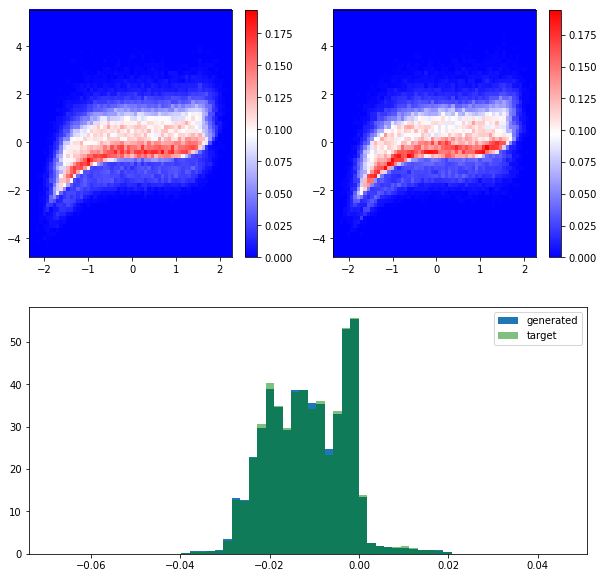

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: 6.2554e-05 - generator_model_2_loss: 0.0118 - generator_D_256x5_output_loss: -0.0117 - discriminator_loss: -6.2554e-05 - discriminator_model_2_loss: -0.0118 - discriminator_D_256x5_output_loss: 0.0117    
Epoch 267/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 4.7034e-05 - generator_model_2_loss: 0.0120 - generator_D_256x5_output_loss: -0.0120 - discriminator_loss: -4.7034e-05 - discriminator_model_2_loss: -0.0120 - discriminator_D_256x5_output_loss: 0.0120     
Epoch 268/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 4.1546e-05 - generator_model_2_loss: 0.0116 - generator_D_256x5_output_loss: -0.0115 - discriminator_loss: -4.1546e-05 - discriminator_model_2_loss: -0.0116 - discriminator_D_256x5_output_loss: 0.0115     
Epoch 269/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

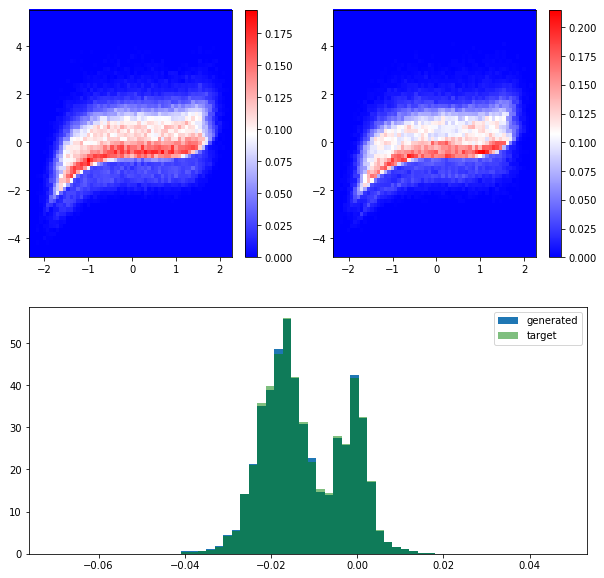

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 4.7598e-05 - generator_model_2_loss: 0.0150 - generator_D_256x5_output_loss: -0.0150 - discriminator_loss: -4.7598e-05 - discriminator_model_2_loss: -0.0150 - discriminator_D_256x5_output_loss: 0.0150    
Epoch 272/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 4.6889e-05 - generator_model_2_loss: 0.0132 - generator_D_256x5_output_loss: -0.0131 - discriminator_loss: -4.6889e-05 - discriminator_model_2_loss: -0.0132 - discriminator_D_256x5_output_loss: 0.0131     
Epoch 273/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.5694e-05 - generator_model_2_loss: 0.0137 - generator_D_256x5_output_loss: -0.0137 - discriminator_loss: -2.5694e-05 - discriminator_model_2_loss: -0.0137 - discriminator_D_256x5_output_loss: 0.0137     
Epoch 274/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

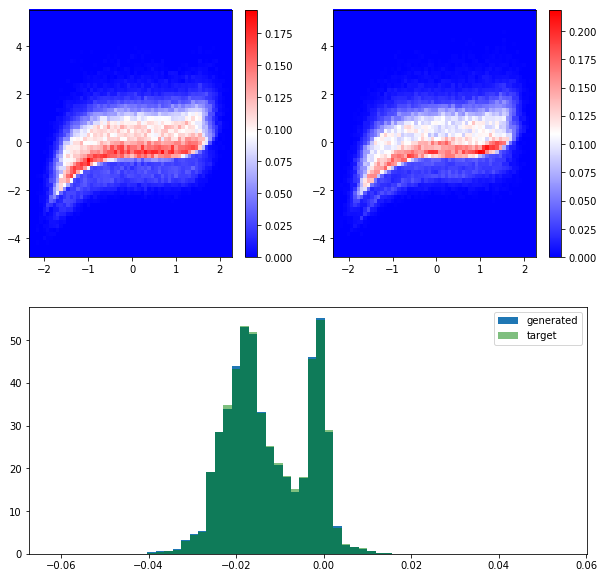

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 1.4770e-05 - generator_model_2_loss: 0.0125 - generator_D_256x5_output_loss: -0.0125 - discriminator_loss: -1.4770e-05 - discriminator_model_2_loss: -0.0125 - discriminator_D_256x5_output_loss: 0.0125    
Epoch 277/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 3.6075e-05 - generator_model_2_loss: 0.0134 - generator_D_256x5_output_loss: -0.0134 - discriminator_loss: -3.6075e-05 - discriminator_model_2_loss: -0.0134 - discriminator_D_256x5_output_loss: 0.0134     
Epoch 278/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 5.2990e-05 - generator_model_2_loss: 0.0137 - generator_D_256x5_output_loss: -0.0136 - discriminator_loss: -5.2990e-05 - discriminator_model_2_loss: -0.0137 - discriminator_D_256x5_output_loss: 0.0136     
Epoch 279/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

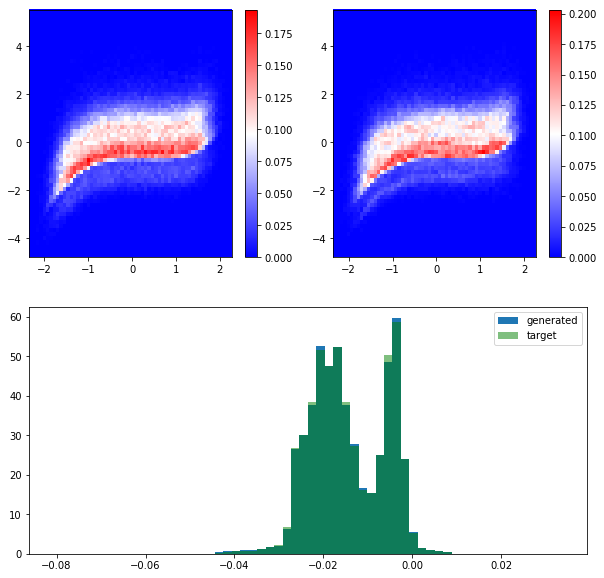

375000/375000 [==============================] - 18s - loss: 0.0000e+00 - generator_loss: 1.7456e-05 - generator_model_2_loss: 0.0142 - generator_D_256x5_output_loss: -0.0142 - discriminator_loss: -1.7456e-05 - discriminator_model_2_loss: -0.0142 - discriminator_D_256x5_output_loss: 0.0142    
Epoch 282/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.6394e-05 - generator_model_2_loss: 0.0142 - generator_D_256x5_output_loss: -0.0142 - discriminator_loss: -2.6394e-05 - discriminator_model_2_loss: -0.0142 - discriminator_D_256x5_output_loss: 0.0142     
Epoch 283/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.3848e-05 - generator_model_2_loss: 0.0150 - generator_D_256x5_output_loss: -0.0149 - discriminator_loss: -2.3848e-05 - discriminator_model_2_loss: -0.0150 - discriminator_D_256x5_output_loss: 0.0149     
Epoch 284/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

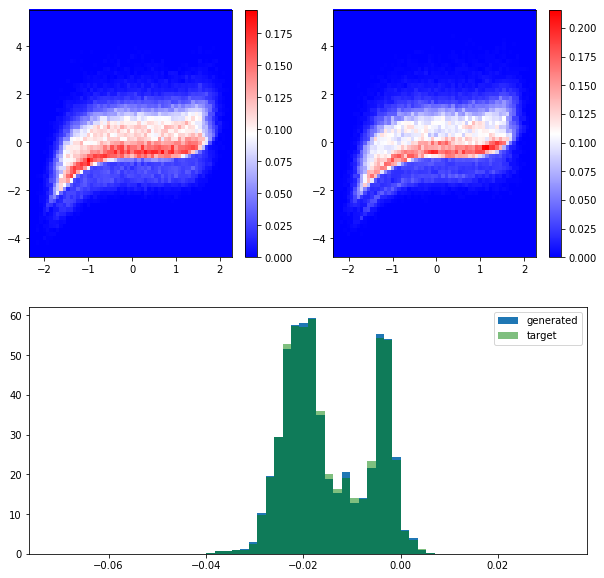

375000/375000 [==============================] - 20s - loss: 0.0000e+00 - generator_loss: 9.8852e-06 - generator_model_2_loss: 0.0139 - generator_D_256x5_output_loss: -0.0139 - discriminator_loss: -9.8852e-06 - discriminator_model_2_loss: -0.0139 - discriminator_D_256x5_output_loss: 0.0139    
Epoch 287/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 3.3145e-05 - generator_model_2_loss: 0.0158 - generator_D_256x5_output_loss: -0.0157 - discriminator_loss: -3.3145e-05 - discriminator_model_2_loss: -0.0158 - discriminator_D_256x5_output_loss: 0.0157     
Epoch 288/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 6.6301e-06 - generator_model_2_loss: 0.0157 - generator_D_256x5_output_loss: -0.0157 - discriminator_loss: -6.6301e-06 - discriminator_model_2_loss: -0.0157 - discriminator_D_256x5_output_loss: 0.0157     
Epoch 289/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

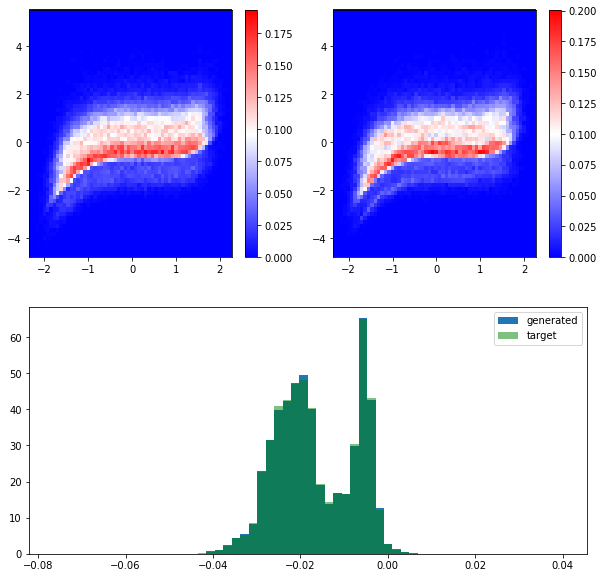

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: -1.2078e-06 - generator_model_2_loss: 0.0167 - generator_D_256x5_output_loss: -0.0167 - discriminator_loss: 1.2078e-06 - discriminator_model_2_loss: -0.0167 - discriminator_D_256x5_output_loss: 0.0167    
Epoch 292/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.2565e-05 - generator_model_2_loss: 0.0141 - generator_D_256x5_output_loss: -0.0141 - discriminator_loss: -2.2565e-05 - discriminator_model_2_loss: -0.0141 - discriminator_D_256x5_output_loss: 0.0141     
Epoch 293/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: -1.2471e-06 - generator_model_2_loss: 0.0139 - generator_D_256x5_output_loss: -0.0139 - discriminator_loss: 1.2471e-06 - discriminator_model_2_loss: -0.0139 - discriminator_D_256x5_output_loss: 0.0139     
Epoch 294/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - 

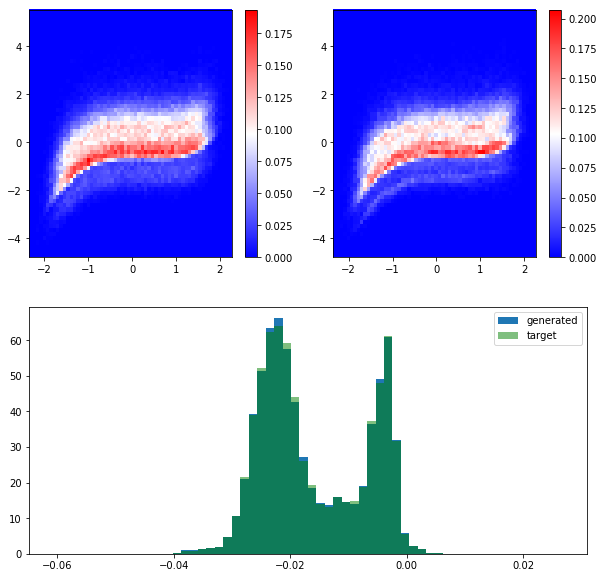

375000/375000 [==============================] - 19s - loss: 0.0000e+00 - generator_loss: 7.4683e-07 - generator_model_2_loss: 0.0180 - generator_D_256x5_output_loss: -0.0180 - discriminator_loss: -7.4683e-07 - discriminator_model_2_loss: -0.0180 - discriminator_D_256x5_output_loss: 0.0180    
Epoch 297/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 2.2002e-05 - generator_model_2_loss: 0.0150 - generator_D_256x5_output_loss: -0.0150 - discriminator_loss: -2.2002e-05 - discriminator_model_2_loss: -0.0150 - discriminator_D_256x5_output_loss: 0.0150     
Epoch 298/298
375000/375000 [==============================] - 3s - loss: 0.0000e+00 - generator_loss: 1.7849e-05 - generator_model_2_loss: 0.0156 - generator_D_256x5_output_loss: -0.0156 - discriminator_loss: -1.7849e-05 - discriminator_model_2_loss: -0.0156 - discriminator_D_256x5_output_loss: 0.0156     


In [25]:
reload(base)

initial_epoch = 0
if hasattr(gan.model,"history"):
    initial_epoch = gan.model.history.epoch[-1]

do = dict(
    x_train=x_train,
    z_train=z_train,
    c_x_train=c_train,
    c_z_train=c_train,
          
    x_test=x_test,
    z_test=z_test,
    c_x_test=c_test,
    c_z_test=c_test,
    
    n_epochs=EPOCHS + initial_epoch,
    initial_epoch=initial_epoch,
    batch_size=BATCH_SIZE,
    plot_every=PLOT_EVERY,
)

base.MyGAN.adversarial_fit(gan,**do)


In [26]:
x_morphed = gan.get_generator().predict([c_test,z_test])[1]

x_p = gan.get_discriminator().predict([c_test,x_test])
z_p   = gan.get_discriminator().predict([c_test,x_morphed])

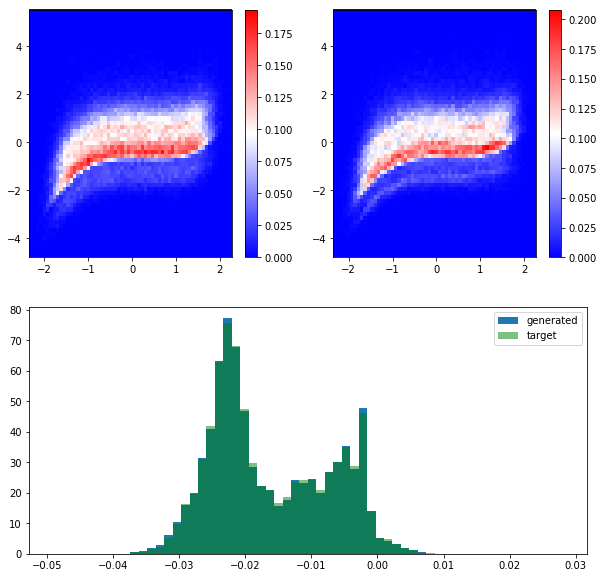

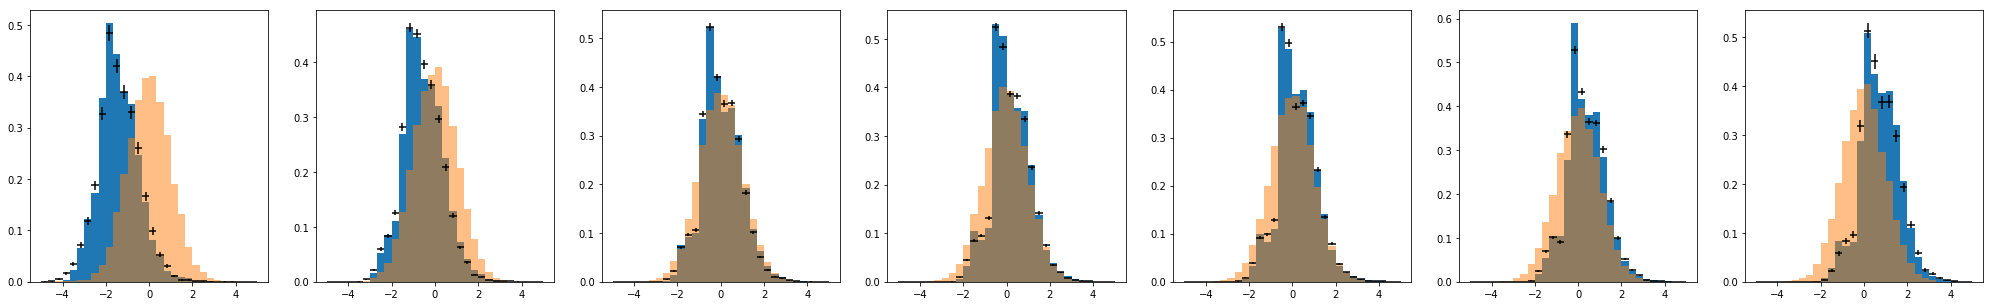

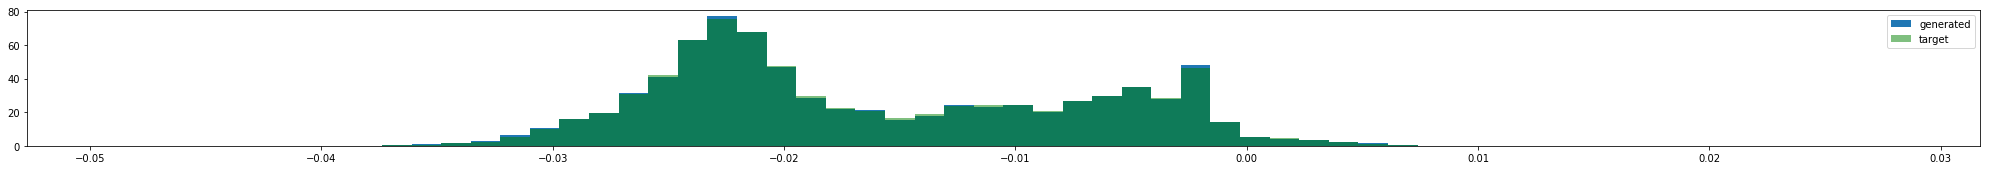

In [27]:
reload(plotting)

quantiles = np.percentile(c_test,[0,5,20,40,60,80,95,100])

plotting.plot_summary_cond(x_test,c_test,x_morphed,c_test,z_test,x_p,z_p,
                           do_slices=False,c_bounds=quantiles)
plotting.plot_summary_cond(x_test,c_test,x_morphed,c_test,z_test,x_p,z_p,
                           do_slices=True,c_bounds=quantiles)


In [21]:
gan.model.train_function

<function keras_adversarial.adversarial_optimizers.AdversarialOptimizerScheduled.make_train_function.<locals>.train>